### Загружаем нужные для работы библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

%matplotlib inline

### Загружаем данные

In [2]:
ads_clients_data_df = pd.read_csv('6days/ads_clients_data.csv')
ads_data_df = pd.read_csv('6days/ads_data.csv')

In [3]:
ads_clients_data_df.head()

date  client_union_id  community_id create_date
0  2020-05-07                1    -130371893  2018-12-24
1  2020-05-07                2    -130304626  2019-02-10
2  2020-05-07                3    -130462599  2019-01-25
3  2020-05-07                4    -130574300  2018-12-09
4  2020-05-07                5    -130292358  2019-01-08

In [4]:
ads_data_df.head()

date                 time event platform   ad_id  client_union_id  \
0  2019-04-01  2019-04-01 00:00:48  view  android   45061            34734   
1  2019-04-01  2019-04-01 00:00:48  view      web  121288           121288   
2  2019-04-01  2019-04-01 00:01:03  view  android  102737           102535   
3  2019-04-01  2019-04-01 00:01:03  view  android  107564           106914   
4  2019-04-01  2019-04-01 00:01:09  view  android    4922               37   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410  
3             107564          CPM    217.3          0                  62711  
4               4400          CPC     60.1          0                1183501

### Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям.

In [5]:
df1 = ads_data_df.groupby(['ad_id','event'], as_index=False).agg({'time':'count'}).rename(columns={'time':'event_count'})
df1

ad_id  event  event_count
0          2  click            1
1          2   view          101
2          3  click            3
3          3   view          184
4       1902  click            1
...      ...    ...          ...
1476  122013   view          156
1477  122023   view           68
1478  122031  click            1
1479  122031   view          138
1480  122078   view           42

[1481 rows x 3 columns]

In [6]:
df2 = df1.pivot(index='ad_id', columns='event', values='event_count')
df2 = df2.fillna(0)
df2['view'] = df2['view'].astype('int')
df2['click'] = df2['click'].astype('int')
df2

event   click  view
ad_id              
2           1   101
3           3   184
1902        1    41
2064        0    35
2132        1    58
...       ...   ...
122004      4   100
122013      0   156
122023      0    68
122031      1   138
122078      0    42

[965 rows x 2 columns]

### Посмотрим на распределение показов объявлений

In [7]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [8]:
# логарифмируем число показов, чтобы график получился более наглядным (уменьшаем разброс в данных)

df3 = df1.query('event == "view"')
df3['view_log'] = np.log(df3['event_count'])
df3

<ipython-input-8-beedbfdefb05>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ad_id event  event_count  view_log
1          2  view          101  4.615121
3          3  view          184  5.214936
5       1902  view           41  3.713572
6       2064  view           35  3.555348
8       2132  view           58  4.060443
...      ...   ...          ...       ...
1475  122004  view          100  4.605170
1476  122013  view          156  5.049856
1477  122023  view           68  4.219508
1479  122031  view          138  4.927254
1480  122078  view           42  3.737670

[956 rows x 4 columns]

D:\WORK\Python\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='view_log', ylabel='Density'>

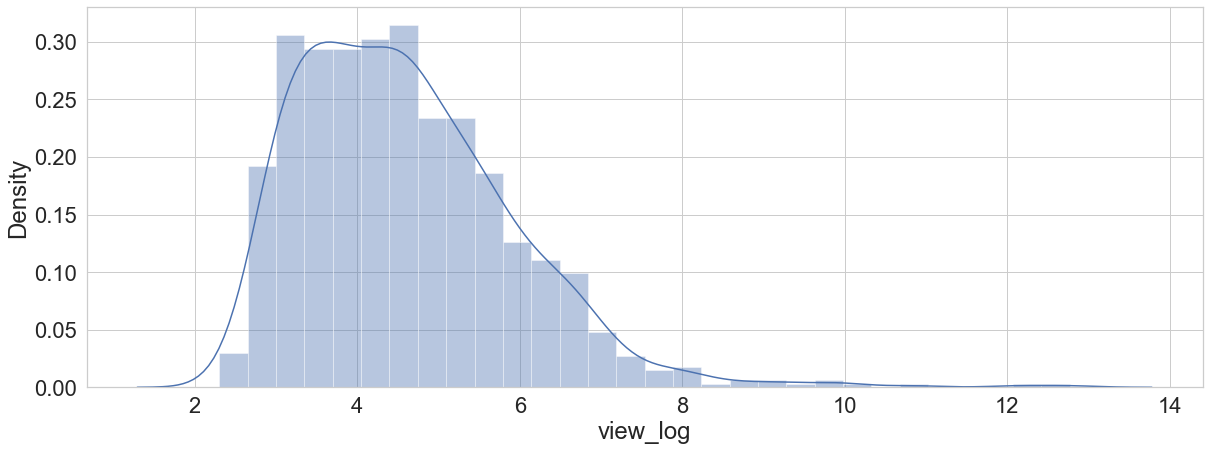

In [9]:
sns.distplot(df3.view_log)

### Теперь посмотрим на среднее кол-во показов на 1 объявление по дням

In [10]:
df4 = pd.read_csv('6days/ads_data.csv',index_col=0, parse_dates=['date'])
df4

time  event platform   ad_id  client_union_id  \
date                                                                       
2019-04-01  2019-04-01 00:00:48   view  android   45061            34734   
2019-04-01  2019-04-01 00:00:48   view      web  121288           121288   
2019-04-01  2019-04-01 00:01:03   view  android  102737           102535   
2019-04-01  2019-04-01 00:01:03   view  android  107564           106914   
2019-04-01  2019-04-01 00:01:09   view  android    4922               37   
...                         ...    ...      ...     ...              ...   
2019-04-05  2019-04-05 20:59:52   view      web  112583           111818   
2019-04-05  2019-04-05 20:59:52   view  android  112583           111818   
2019-04-05  2019-04-05 20:59:52  click      web  112583           111818   
2019-04-05  2019-04-05 20:59:52   view      web  113350           113036   
2019-04-05  2019-04-05 20:59:52   view  android  117353           117350   

            campaign_union_id ad_cost_type  ad_cost  has_video  \
date                                                             
2019-04-01              45061          CPM    200.6          0   
2019-04-01             121288          CPM    187.4          0   
2019-04-01             102564          CPC     60.7          0   
2019-04-01             107564          CPM    217.3          0   
2019-04-01               4400          CPC     60.1          0   
...                       ...          ...      ...        ...   
2019-04-05             112260          CPM    210.1          0   
2019-04-05             112260          CPM    210.1          0   
2019-04-05             112260          CPM    210.1          0   
2019-04-05             113251          CPM    183.3          0   
2019-04-05             117353          CPM    207.5          1   

            target_audience_count  
date                               
2019-04-01                1955269  
2019-04-01                 232011  
2019-04-01                   4410  
2019-04-01                  62711  
2019-04-01                1183501  
...                           ...  
2019-04-05                  22392  
2019-04-05                  22392  
2019-04-05                  22392  
2019-04-05                 571929  
2019-04-05                 167598  

[1000000 rows x 10 columns]

In [11]:
df5 = df4.query("event == 'view'").groupby(['ad_id','date']).agg({'time':'count'}).rename(columns={'time':'ad_view_count'})

In [12]:
mean_df = df5.groupby('date').agg({'ad_view_count':'mean'})
mean_df

ad_view_count
date                     
2019-04-01     154.482270
2019-04-02     137.786982
2019-04-03     163.952778
2019-04-04     675.901720
2019-04-05     919.109677
2019-04-06     277.122727

In [13]:
mean_rol_df = df5.groupby('date').agg({'ad_view_count':'mean'}).rolling(2).mean()
mean_rol_df

ad_view_count
date                     
2019-04-01            NaN
2019-04-02     146.134626
2019-04-03     150.869880
2019-04-04     419.927249
2019-04-05     797.505699
2019-04-06     598.116202

### Скользящее среднее часто используется для поиска аномалий в данных. Нанесем на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных.

<AxesSubplot:xlabel='date', ylabel='ad_view_count'>

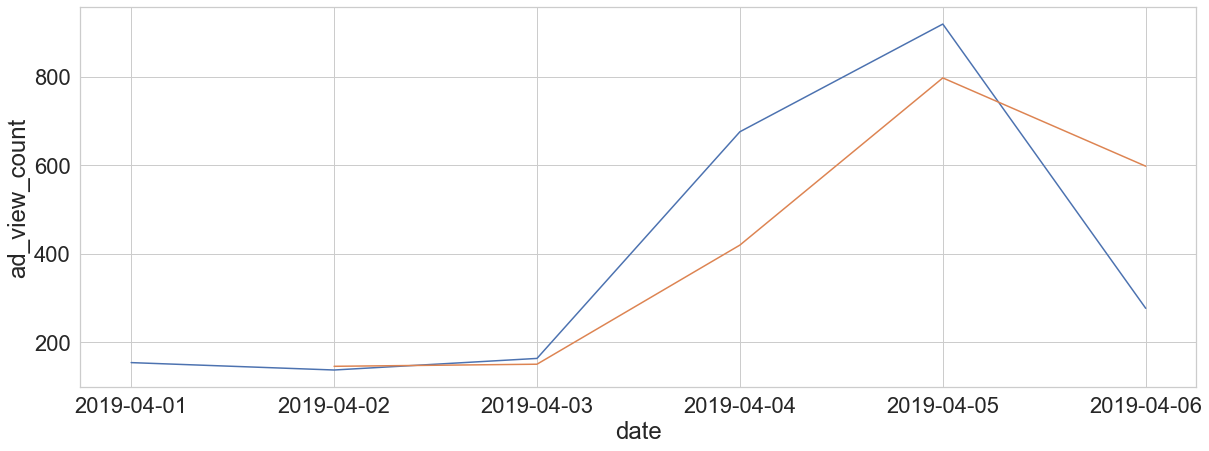

In [14]:
sns.lineplot(y=mean_df.ad_view_count, x=mean_df.index)
sns.lineplot(y=mean_rol_df.ad_view_count, x=mean_rol_df.index)

и посчитаем, в какой день наблюдается наибольшая разница (по модулю) между арифметическим средним и скользящим средним

In [15]:
columns = ['mean_df_count','mean_rol_df_count']
merged_df = pd.concat([mean_df, mean_rol_df], axis = 1)
merged_df.columns = columns
merged_df = merged_df.fillna(0)
merged_df['dif_abs'] = (merged_df.mean_df_count - merged_df.mean_rol_df_count).abs()
merged_df

mean_df_count  mean_rol_df_count     dif_abs
date                                                    
2019-04-01     154.482270           0.000000  154.482270
2019-04-02     137.786982         146.134626    8.347644
2019-04-03     163.952778         150.869880   13.082898
2019-04-04     675.901720         419.927249  255.974471
2019-04-05     919.109677         797.505699  121.603979
2019-04-06     277.122727         598.116202  320.993475

### Объединим данные рекламы с данными о рекламных клиентах и найдем среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date)

In [16]:
full_merged_df = ads_data_df.merge(ads_clients_data_df, on=['client_union_id'], how='outer')
full_merged_df['date_x'] = pd.to_datetime(full_merged_df['date_x'])
full_merged_df['create_date'] = pd.to_datetime(full_merged_df['create_date'])
#full_merged_df.dtypes

In [17]:
full_merged_df['time_dif'] = (full_merged_df['date_x'] - full_merged_df['create_date']).dt.days
mean_days = full_merged_df.groupby('client_union_id').agg({'time_dif':'min'}).mean()

print(f'Среднее кол-во дней между датой создания рекламного клиента и датой первого запуска объявления: {round(mean_days.item(),0)}')

Среднее кол-во дней между датой создания рекламного клиента и датой первого запуска объявления: 124.0


### Вычислим конверсию из создания рекламного кабинета в запуск первой рекламы

In [36]:
cl = full_merged_df[~full_merged_df.time_dif.isna()].groupby('client_union_id', as_index=False).client_union_id.nunique().sum()
cl_full = full_merged_df.groupby('client_union_id', as_index=False).client_union_id.nunique().sum()
convertion_right = round(((int(cl.values) / int(cl_full.values)) * 100),2)
convertion_wrong = round((int(cl.values) / int(cl_full.values)),2) * 100

print(f'Конверсия с верным округлением: {convertion_right} / Конверсия с НЕверным округлением: {convertion_wrong}')

Конверсия с верным округлением: 0.69 / Конверсия с НЕверным округлением: 1.0


### Разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

In [43]:
full_merged_df1 = full_merged_df
full_merged_df1.drop_duplicates('client_union_id', inplace = True)
full_merged_df1['time_dif'] = pd.to_timedelta(full_merged_df1['time_dif'], 'D')
slice_bins = [
    pd.Timedelta(days = 0),
    pd.Timedelta(days = 30),
    pd.Timedelta(days = 90),
    pd.Timedelta(days = 180),
    pd.Timedelta(days = 365)
]

full_merged_df1['time_dif_categorical'] = pd.cut(full_merged_df1['time_dif'], bins=slice_bins)
full_merged_df1.time_dif_categorical.value_counts()

(90 days 00:00:00, 180 days 00:00:00]     395
(30 days 00:00:00, 90 days 00:00:00]      263
(180 days 00:00:00, 365 days 00:00:00]    169
(0 days 00:00:00, 30 days 00:00:00]        11
Name: time_dif_categorical, dtype: int64

### И построим интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них

In [44]:
full_merged_df1_plot = full_merged_df1.groupby('time_dif_categorical', as_index = True)\
        .agg({'time_dif_categorical':'count'})\
        .rename(columns={'time_dif_categorical':'count'})
full_merged_df1_plot = full_merged_df1_plot.reset_index()

fig = px.bar(full_merged_df1_plot, x=full_merged_df1_plot.time_dif_categorical.astype('str'), y='count')
fig.show()